In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


tensor([2, 1, 2, 0, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0, 2, 2, 0])
[1,     1] loss: 1.102
[1,     2] loss: 1.100
[1,     3] loss: 1.106
[1,     4] loss: 1.102
[1,     5] loss: 1.093
[1,     6] loss: 1.102
[1,     7] loss: 1.103
[1,     8] loss: 1.100
[1,     9] loss: 1.094
[1,    10] loss: 1.100
[1,    11] loss: 1.106
[1,    12] loss: 1.107
[1,    13] loss: 1.096
[1,    14] loss: 1.097
[1,    15] loss: 1.097
[1,    16] loss: 1.104
[1,    17] loss: 1.097
[1,    18] loss: 1.098
[1,    19] loss: 1.097
[1,    20] loss: 1.096
[1,    21] loss: 1.104
[1,    22] loss: 1.099
[1,    23] loss: 1.094
[1,    24] loss: 1.104
[1,    25] loss: 1.089
[1,    26] loss: 1.089
[1,    27] loss: 1.098
[1,    28] loss: 1.100
[1,    29] loss: 1.101
[1,    30] loss: 1.089
[1,    31] loss: 1.094
[1,    32] loss: 1.104
[1,    33] loss: 1.102
[1,    34] loss: 1.103
[1,    35] loss: 1.099
[1,    36] loss: 1.097
[1,    37] loss: 1.092
[1,    38] loss: 1.094
[1,    39] loss: 1.092
[1,    40] loss: 1.096
[1,    41] 

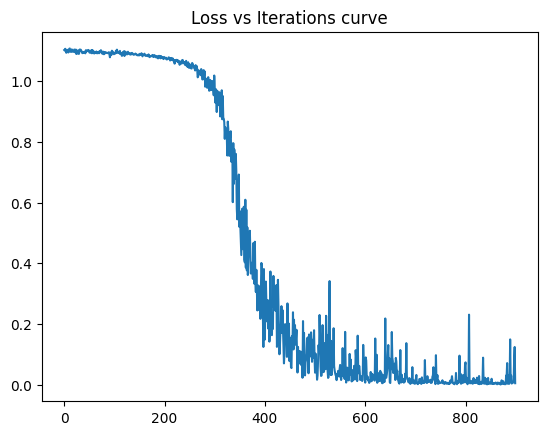

In [5]:
import os
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import pandas as pd
from time import time
from sklearn.metrics import accuracy_score, f1_score

############ Give the path of the "datasets" folder here! ###############
path_to_dataset = "/content/drive/MyDrive/Dataset/datasets"
#########################################################################

########### Reduce this to get better speed. It may also mean lower accuracy. #######
num_epochs = 20
################################################################################################

transform = transforms.Compose([transforms.Resize((64, 64)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ])

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 5)
        self.conv2 = nn.Conv2d(10, 16, 3)
        self.fc1 = nn.Linear(16 * 14 * 14, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 3)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features = num_features * s
        return num_features

time_start = time()
net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

data_f1 = datasets.ImageFolder(root='/content/drive/MyDrive/Dataset/datasets/train', transform=transform)
folderL = DataLoader(data_f1, batch_size=20, shuffle=True)
dataiter = iter(folderL)
images, labels = next(dataiter)

print(labels)

torch.manual_seed(0)
mini_batch = 20
loss_values = []
for epoch in range(num_epochs):
    for i, data in enumerate(folderL, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, loss.item()))
        loss_values.append(loss.item())

plt.plot(loss_values)
plt.title("Loss vs Iterations curve")

print('Finished Training')

correct = 0
total = 0
with torch.no_grad():
    for data in folderL:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the train images: %d %%' % (100 * correct / total))

data_f2 = datasets.ImageFolder(root='/content/drive/MyDrive/Dataset/datasets/test', transform=transform)
folderTest = DataLoader(data_f2, batch_size=1, shuffle=False)

gt_arr = []
pred_arr = []
with torch.no_grad():
    for data in folderTest:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        gt_arr.append(labels.numpy()[0])
        pred_arr.append(predicted.numpy()[0])

df = pd.DataFrame({
    'GT': gt_arr,
    'Pred': pred_arr
})

excel_filename = 'output.xlsx'
df.to_excel(excel_filename, index=False)
print("Saved the predictions in the Excel. Use it to calculate the accuracy and F1 score!")

print("Total time taken = ", time() - time_start, " sec")

# accuracy and F1 score
accuracy = accuracy_score(gt_arr, pred_arr)
f1 = f1_score(gt_arr, pred_arr, average='weighted')
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'F1 Score: {f1:.2f}')

FOLD 0
--------------------------------


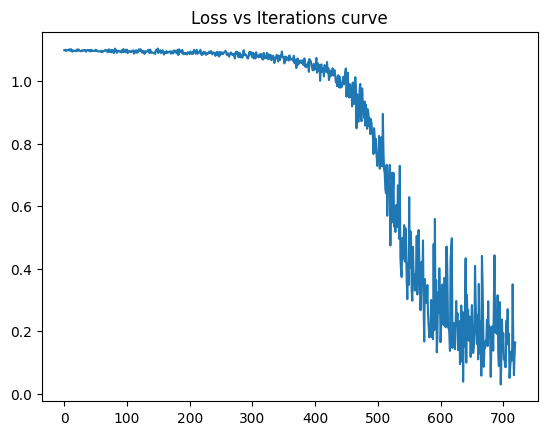

Saved predictions for fold 0 in output_fold_0.xlsx
Fold 0 - Accuracy: 97.22%, F1 Score: 0.97
FOLD 1
--------------------------------


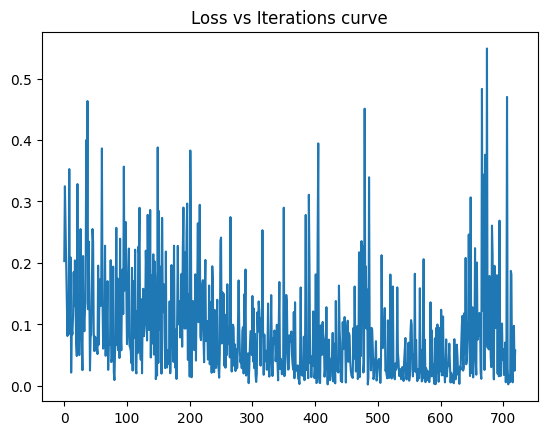

Saved predictions for fold 1 in output_fold_1.xlsx
Fold 1 - Accuracy: 96.11%, F1 Score: 0.96
FOLD 2
--------------------------------


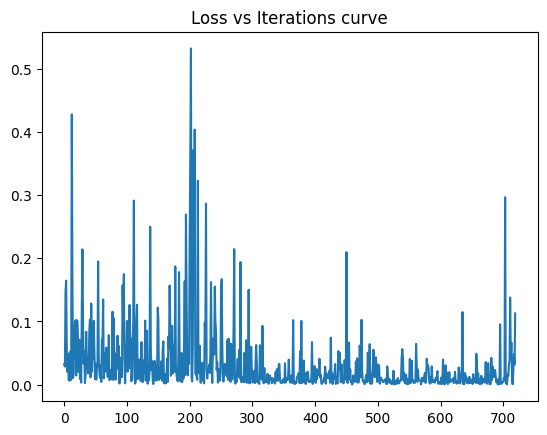

Saved predictions for fold 2 in output_fold_2.xlsx
Fold 2 - Accuracy: 98.33%, F1 Score: 0.98
FOLD 3
--------------------------------


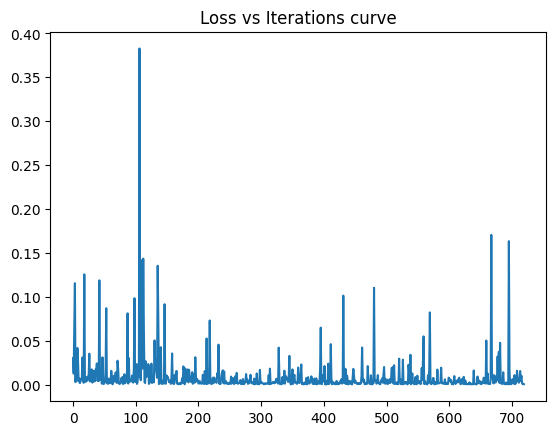

Saved predictions for fold 3 in output_fold_3.xlsx
Fold 3 - Accuracy: 100.00%, F1 Score: 1.00
FOLD 4
--------------------------------


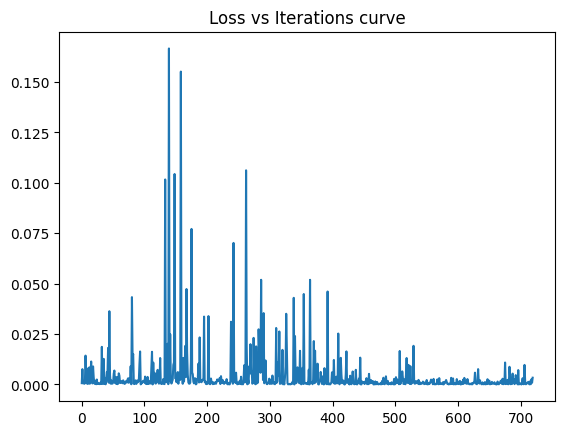

Saved predictions for fold 4 in output_fold_4.xlsx
Fold 4 - Accuracy: 100.00%, F1 Score: 1.00
Overall Accuracy: 98.33%, Overall F1 Score: 0.98
Total time taken =  495.7946033477783  sec


In [7]:
import os
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import pandas as pd
from time import time
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold
import numpy as np

############ Give the path of the "datasets" folder here! ###############
# path_to_dataset = "datasets/"
#########################################################################

########### Reduce this to get better speed. It may also mean lower accuracy. #######
num_epochs = 20
################################################################################################

transform = transforms.Compose([transforms.Resize((64, 64)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ])

# Data Augmentation
augment = transforms.Compose([transforms.Resize((64, 64)),
                              transforms.RandomHorizontalFlip(),
                              transforms.RandomRotation(10),
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 5)
        self.conv2 = nn.Conv2d(10, 16, 3)
        self.fc1 = nn.Linear(16 * 14 * 14, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 3)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features = num_features * s
        return num_features

def train_and_evaluate(net, train_loader, test_loader, criterion, optimizer, num_epochs):
    loss_values = []
    for epoch in range(num_epochs):
        net.train()
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, loss.item()))
            loss_values.append(loss.item())
    plt.plot(loss_values)
    plt.title("Loss vs Iterations curve")
    plt.show()

    net.eval()
    gt_arr = []
    pred_arr = []
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            gt_arr.append(labels.numpy()[0])
            pred_arr.append(predicted.numpy()[0])
    return gt_arr, pred_arr

time_start = time()
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

data_f1 = datasets.ImageFolder(root='/content/drive/MyDrive/Dataset/datasets/train', transform=augment)
data_f2 = datasets.ImageFolder(root='/content/drive/MyDrive/Dataset/datasets/test', transform=transform)

# Split data for cross-validation
k_folds = 5
results = {}

kfold = KFold(n_splits=k_folds, shuffle=True)
X = np.arange(len(data_f1))
Y = data_f1.targets

for fold, (train_ids, test_ids) in enumerate(kfold.split(X)):
    print(f'FOLD {fold}')
    print('--------------------------------')

    train_subset = torch.utils.data.Subset(data_f1, train_ids)
    test_subset = torch.utils.data.Subset(data_f1, test_ids)

    train_loader = DataLoader(train_subset, batch_size=20, shuffle=True)
    test_loader = DataLoader(test_subset, batch_size=1, shuffle=False)

    gt_arr, pred_arr = train_and_evaluate(net, train_loader, test_loader, criterion, optimizer, num_epochs)

    df = pd.DataFrame({
        'GT': gt_arr,
        'Pred': pred_arr
    })

    excel_filename = f'output_fold_{fold}.xlsx'
    df.to_excel(excel_filename, index=False)
    print(f'Saved predictions for fold {fold} in {excel_filename}')

    accuracy = accuracy_score(gt_arr, pred_arr)
    f1 = f1_score(gt_arr, pred_arr, average='weighted')
    print(f'Fold {fold} - Accuracy: {accuracy * 100:.2f}%, F1 Score: {f1:.2f}')
    results[fold] = {'accuracy': accuracy, 'f1': f1}

# Overall results
mean_accuracy = np.mean([results[fold]['accuracy'] for fold in results])
mean_f1 = np.mean([results[fold]['f1'] for fold in results])
print(f'Overall Accuracy: {mean_accuracy * 100:.2f}%, Overall F1 Score: {mean_f1:.2f}')

print("Total time taken = ", time() - time_start, " sec")
